In [1]:
%pylab inline
from astroML.density_estimation import KDE, KNeighborsDensity

Populating the interactive namespace from numpy and matplotlib


In [15]:
data = genfromtxt('../data/willman1.csv', delimiter=',')

In [34]:
# Create  the grid on which to evaluate the results
Nx = 125
Ny = 125
xmin, xmax = (161.6, 163.2)
ymin, ymax = (50.6, 51.5)

#------------------------------------------------------------
# Evaluate for several models
Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                            np.linspace(ymin, ymax, Ny)))).T

In [35]:
ra_will1 = data[:,0]
dec_will1 = data[:,1]

In [36]:
X = np.array([ra_will1, dec_will1]).T
shape(X)

(27456, 2)

In [44]:
knn40 = KNeighborsDensity('bayesian', 200)
dens_k40 = knn40.fit(X).eval(Xgrid).reshape((Ny, Nx))

In [45]:
shape(dens_k40)

(125, 125)

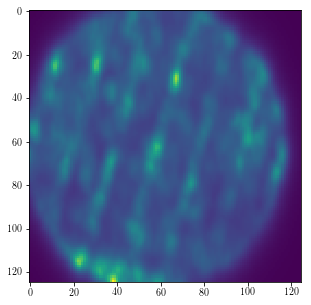

In [46]:
figure(figsize(7,5))
imshow(dens_k40)

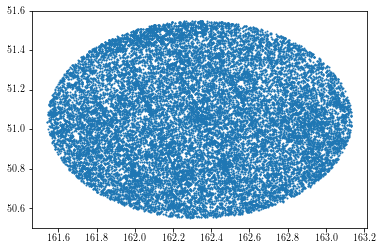

In [28]:
scatter(ra_will1, dec_will1, s=1)

In [48]:
def NN_bayesian_density(x, y, NN, grid_size):
    """
    Function to compute the density of a distribution of particles using the K-Nearest Neighboors
    method from: http://www.astroml.org/modules/generated/astroML.density_estimation.KNeighborsDensity.html#astroML.density_estimation.KNeighborsDensity
    
    See Ivezic 10? for the details on how the algorithm works.
    
    Input:
    ------
    x : 1D numpy.array
        Array with the x-coordinates of the data.
    y : 1D numpy.array
        Array with the y-coordinates of the data.
    NN : int
        Number of neighboors to compute the desnity.
    grid_size : int
        Grid size in which the density is going to be evaluated.
        
    """
    assert len(x)==len(y), "Input data have different size"
    assert type(NN) == int, "NN should be of type int"
    assert type(grid_size) == int, "grid_zise should be of type int"
    
    # Grid parameters
    Nx = grid_size
    Ny = grid_size
    xmin, xmax = (min(x), max(x))
    ymin, ymax = (min(y), max(y))

    # Making a grid
    Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                                np.linspace(ymin, ymax, Ny)))).T
    # Putting data in 2d-array
    X = np.array([x, y]).T
    
    # Computing the density
    knn = KNeighborsDensity('bayesian', NN)
    dens_KNN = knn.fit(X).eval(Xgrid).reshape((Ny, Nx))
    
    return dens_KNN

    
    

In [51]:
dens_test = NN_bayesian_density(ra_will1, dec_will1, 5, 120)